In [1]:
import audimg as A

/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/mvpa2/base/hdf5.py:40: H5pyDeprecationWarning: The h5py.highlevel module is deprecated, code should import directly from h5py, e.g. 'from h5py import File'.
  import h5py.highlevel  # >= 2.8.0, https://github.com/h5py/h5py/issues/1063
/home/mcasey/.conda/envs/pymvpa/lib/python2.7/site-packages/mvpa2/testing/tools.py:81: DeprecationWarning: Importing from numpy.testing.decorators is deprecated since numpy 1.15.0, import from numpy.testing instead.
  from numpy.testing.decorators import skipif


In [31]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
A.pl.rcParams['figure.figsize']=(12,6)

<h2>Load pre-computed per-subject and per-task results, calculate group results</h2>

In [25]:
# Load subj, task partial result files (outputs from cluster jobs)
subj_res = A.load_all_subj_res_from_parts()

# Calculate group result (ttest / wilcoxon) from within-subject classification (WSC) means
group_res=A.calc_group_results(subj_res)

<h2>Group Results (N=11), Mean Clf Accuracy by Task, ROI and Cond [HD, IM]</h2>

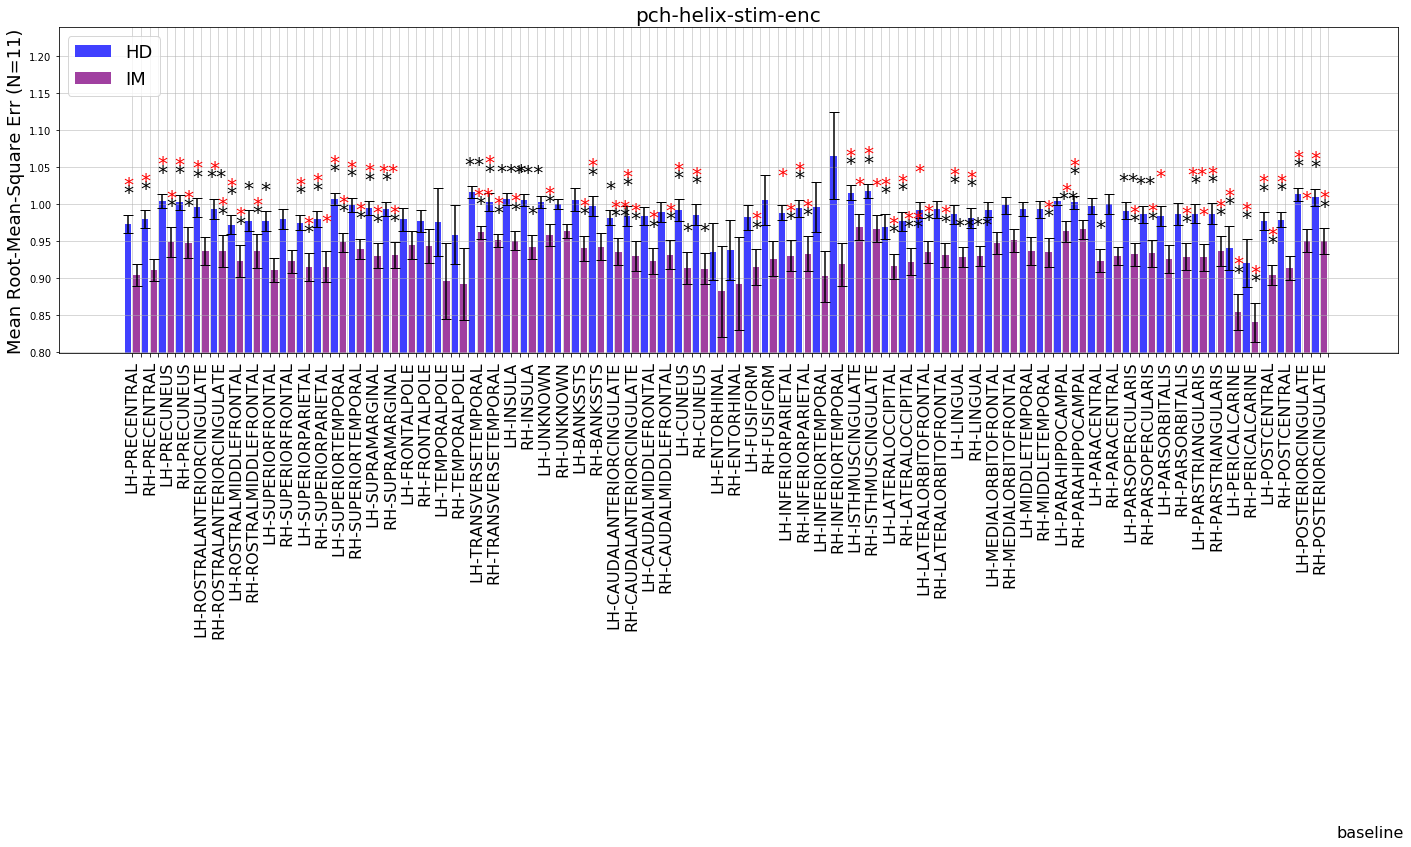

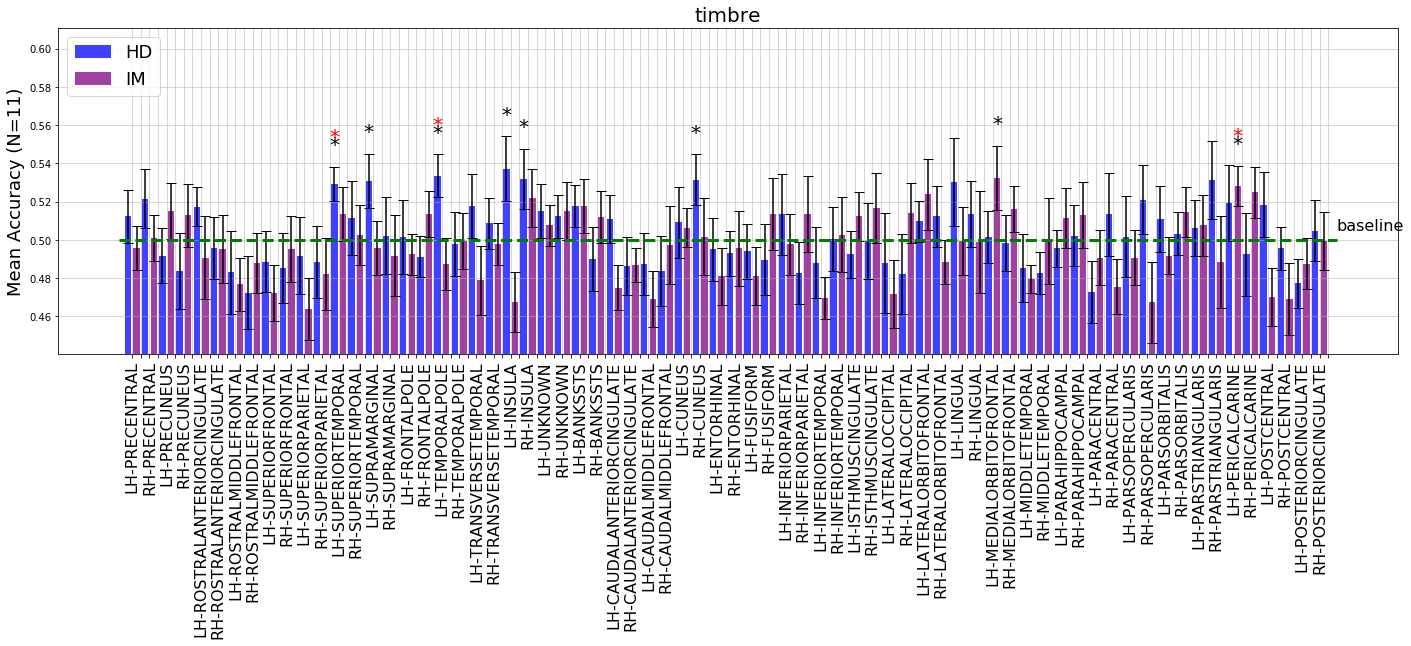

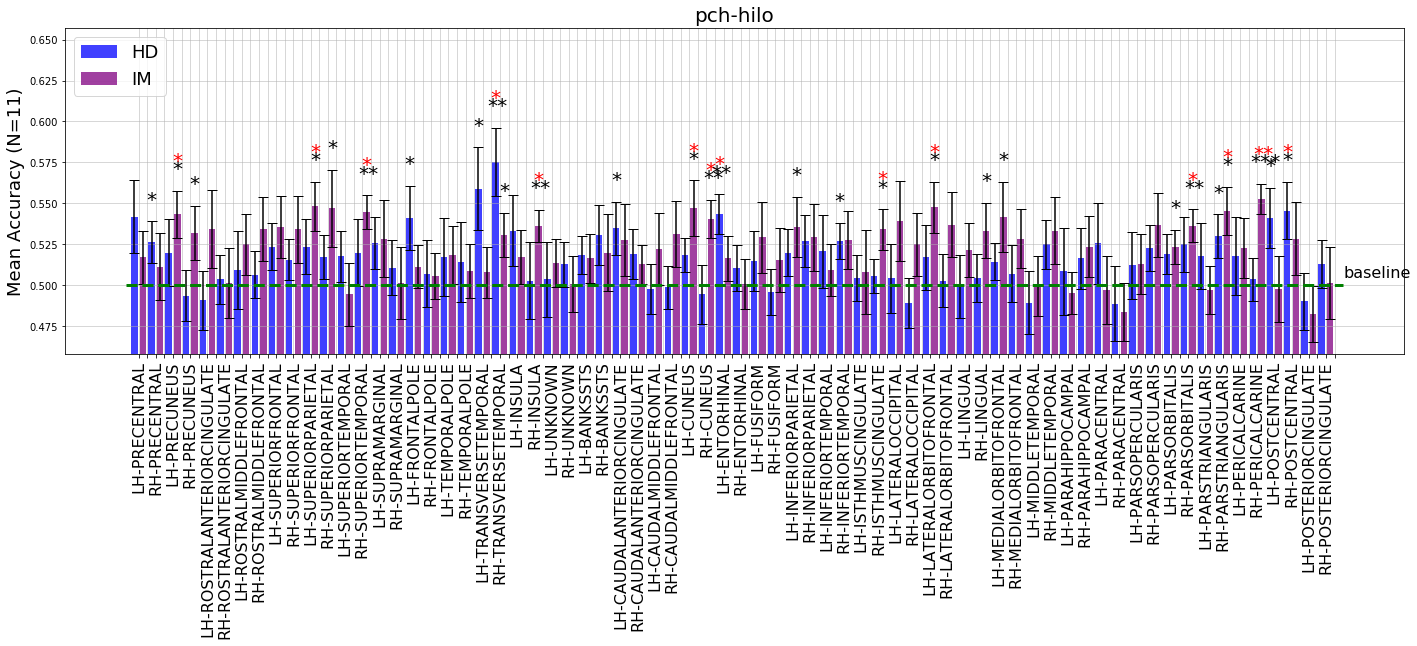

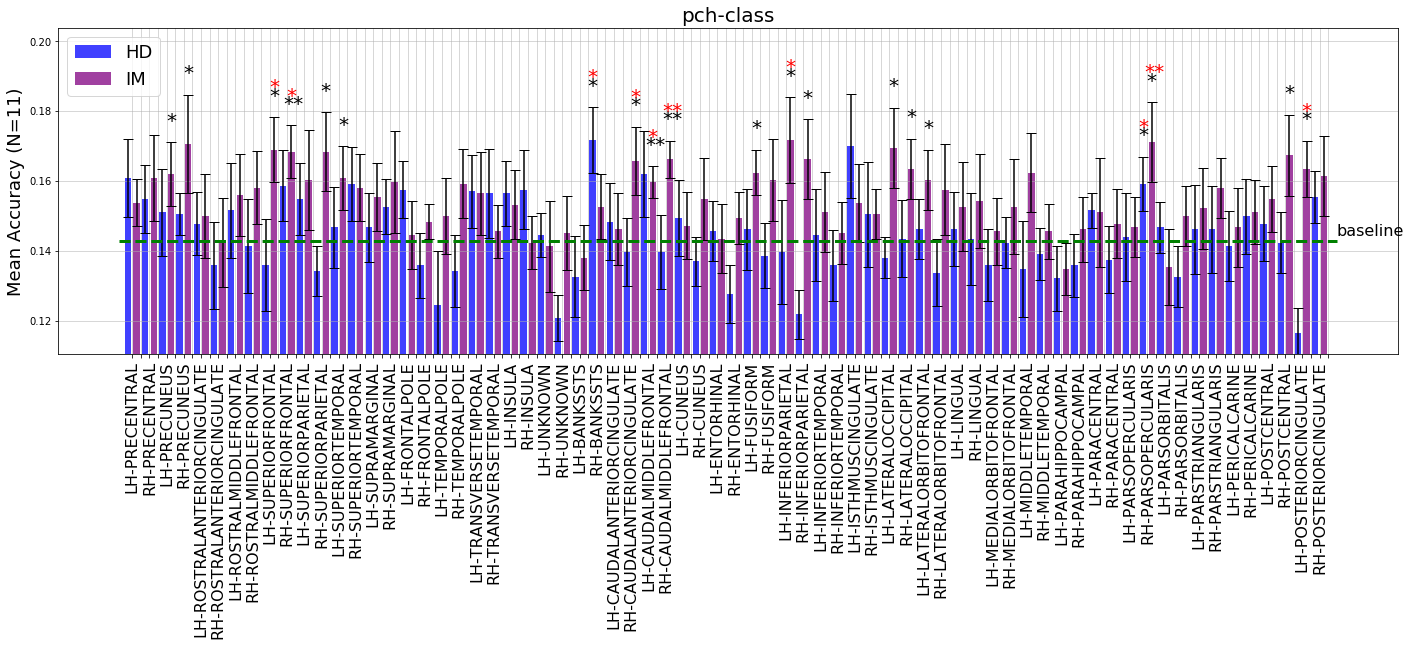

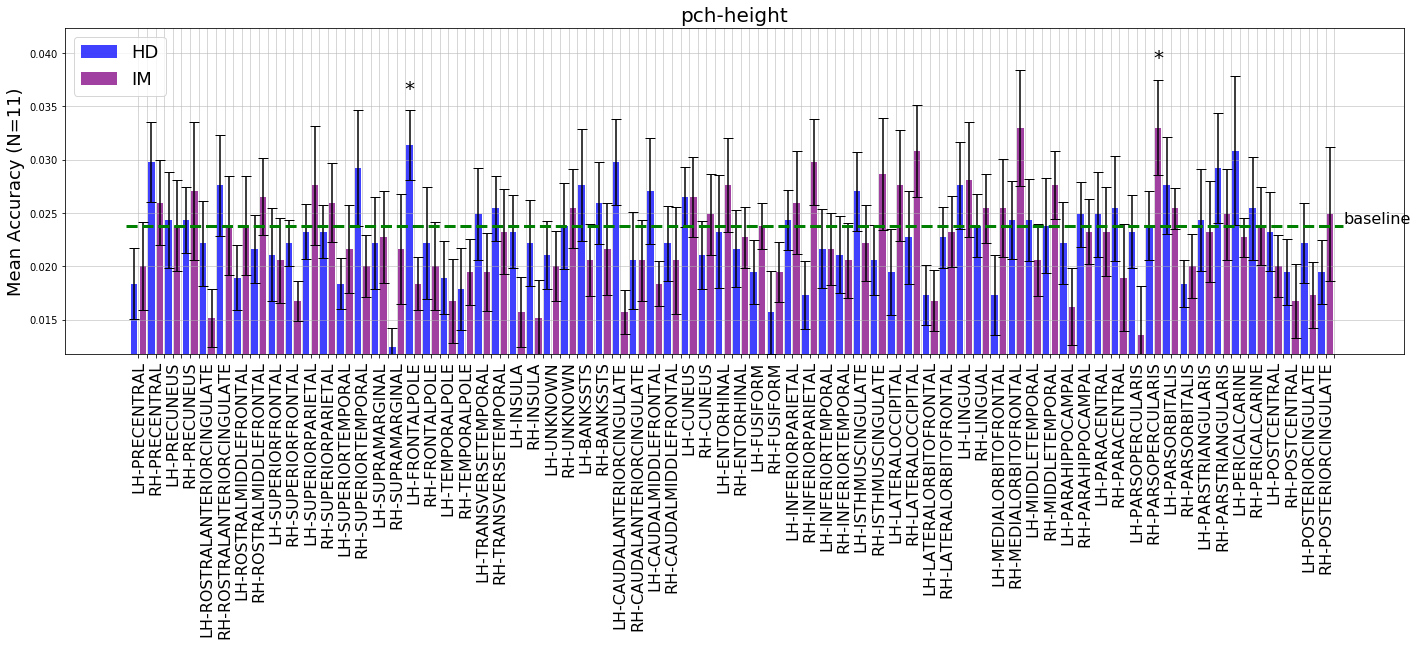

In [34]:
A.plot_group_results(group_res)

In [ ]:
# TODO: Plot individual subjects' results

In [33]:
reload(A)

<module 'audimg' from 'audimg.py'>

In [18]:
%pdb

Automatic pdb calling has been turned ON

